# Lab 7: Neural networks 

In this lab we will build dense neural networks on the MNIST dataset.

Make sure you read the tutorial for this lab first.

## Load the data and create train-test splits

In [1]:
# Global imports and settings
from preamble import *
import tensorflow.keras as keras
print("Using Keras",keras.__version__)
%matplotlib inline

Using Keras 2.6.0


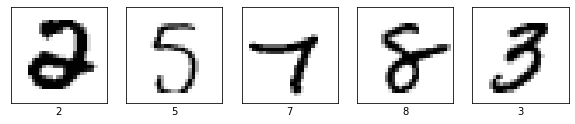

In [2]:
# Download MNIST data. Takes a while the first time.
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)

# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n], cmap=plt.cm.gray_r)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel("{}".format(y[n]))
plt.show();

In [3]:
# For MNIST, there exists a predefined stratified train-test split of 60000-10000. We therefore don't shuffle or stratify here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=0)

## Exercise 1: Preprocessing
* Normalize the data: map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. 
* Store the floating-point values in `x_train_normalized` and `x_test_normalized`.
* Map the class label to a on-hot-encoded value. Store in `y_train_encoded` and `y_test_encoded`.

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Exercise 2: Create a deep neural net model

Implement a `create_model` function which defines the topography of the deep neural net, specifying the following:

* The number of layers in the deep neural net: Use 2 dense layers for now.
* The number of nodes in each layer: these are parameters of your function.
* Any regularization layers. Add at least one dropout layer.
* The optimizer and learning rate. Make the learning rate a parameter of your function as well.

Consider:
* What should be the shape of the input layer?
* Which activation function you will need for the last layer, since this is a 10-class classification problem?

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [7]:
### Create and compile a 'deep' neural net
def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.3):
    model = models.Sequential()
    
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(layer_1_units, activation="relu"))
    
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(layer_2_units, activation="softmax"))
    
    model.compile(
        optimizer=keras.optimizers.Adam(lr=learning_rate),
        loss="categorical_crossentropy",
        metrics=['accuracy'],
    )
    
    return model

## Exercise 3: Create a training function
Implement a `train_model` function which trains and evaluates a given model.
It should do a train-validation split and report the train and validation loss and accuracy, and return the training history.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def train_model(model, X, y, validation_split=0.1, epochs=10, batch_size=None):
    """
    model: the model to train
    X, y: the training data and labels
    validation_split: the percentage of data set aside for the validation set
    epochs: the number of epochs to train for
    batch_size: the batch size for minibatch SGD
    """
    Xt, Xv, yt, yv = train_test_split(X, y, test_size=validation_split, shuffle=True, stratify=y)
    
    history = model.fit(Xt, yt, epochs=epochs, batch_size=batch_size, validation_data=(Xv, yv))
    
    return history

## Exercise 4: Evaluate the model

Train the model with a learning rate of 0.003, 50 epochs, batch size 4000, and a validation set that is 20% of the total training data.
Use default settings otherwise. Plot the learning curve of the loss, validation loss, accuracy, and validation accuracy. Finally, report the performance on the test set.

Feel free to use the plotting function below, or implement the callback from the tutorial to see results in real time.

In [10]:
# Helper plotting function
#
# history: the history object returned by the fit function
# list_of_metrics: the metrics to plot
def plot_curve(history, list_of_metrics):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m, lw=2)

    plt.legend()

2021-11-03 13:04:17.546863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 13:04:17.550791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 13:04:17.551019: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 13:04:17.551667: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 1.7338 - accuracy: 0.4201 - val_loss: 0.9684 - val_accuracy: 0.7734
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.9282 - accuracy: 0.7152 - val_loss: 0.5895 - val_accuracy: 0.8496
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.7967 - val_loss: 0.4686 - val_accuracy: 0.8753
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5751 - accuracy: 0.8255 - val_loss: 0.4073 - val_accuracy: 0.8898
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5229 - accuracy: 0.8441 - val_loss: 0.3720 - val_accuracy: 0.8995
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4811 - accuracy: 0.8579 - val_loss: 0.3456 - val_accuracy: 0.9051
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4550 - accuracy: 0.8667 - val_loss: 0.3272 - val_accuracy: 0.9097
Epoch 8/50
12/12 [=

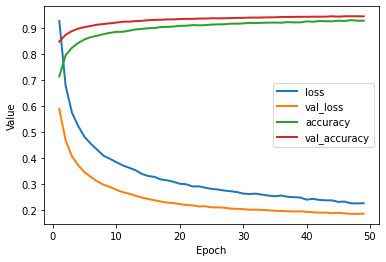

In [11]:
model = create_model(learning_rate=0.003)

history = train_model(model, X_train_normalized, y_train_encoded, validation_split=0.2, epochs=50, batch_size=4000)

plot_curve(history, ["loss", "val_loss", "accuracy", "val_accuracy"])

X_test_loss, X_test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)

print(f"Loss: {X_test_loss}, Accuracy: {X_test_accuracy}")

## Exercise 5: Optimize the model

Try to optimize the model, either manually or with a tuning method. At least optimize the following:
* the number of hidden layers 
* the number of nodes in each layer
* the amount of dropout layers and the dropout rate

Try to reach at least 96% accuracy against the test set.

Epoch 1/70
12/12 [==============================] - 0s 15ms/step - loss: 1.6829 - accuracy: 0.4760 - val_loss: 0.9725 - val_accuracy: 0.7710
Epoch 2/70
12/12 [==============================] - 0s 6ms/step - loss: 0.8266 - accuracy: 0.7546 - val_loss: 0.5341 - val_accuracy: 0.8567
Epoch 3/70
12/12 [==============================] - 0s 6ms/step - loss: 0.5710 - accuracy: 0.8270 - val_loss: 0.4223 - val_accuracy: 0.8842
Epoch 4/70
12/12 [==============================] - 0s 7ms/step - loss: 0.4761 - accuracy: 0.8586 - val_loss: 0.3707 - val_accuracy: 0.8997
Epoch 5/70
12/12 [==============================] - 0s 7ms/step - loss: 0.4280 - accuracy: 0.8737 - val_loss: 0.3396 - val_accuracy: 0.9068
Epoch 6/70
12/12 [==============================] - 0s 6ms/step - loss: 0.3947 - accuracy: 0.8844 - val_loss: 0.3188 - val_accuracy: 0.9119
Epoch 7/70
12/12 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.8925 - val_loss: 0.3038 - val_accuracy: 0.9156
Epoch 8/70
12/12 [=

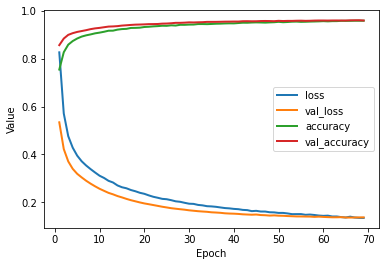

In [12]:
# Improvements:
#   * Decrease dropout rate from 0.3 to 0.15
#   * Increase epochs from 50 to 70
model = create_model(learning_rate=0.003, dropout_rate=0.15)

history = train_model(model, X_train_normalized, y_train_encoded, validation_split=0.2, epochs=70, batch_size=4000)

plot_curve(history, ["loss", "val_loss", "accuracy", "val_accuracy"])

X_test_loss, X_test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)

print(f"Loss: {X_test_loss}, Accuracy: {X_test_accuracy}")